In [3]:
import pandas as pd
import numpy as np

In [58]:
reviews = pd.read_csv('yelp.csv')
reviews.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [59]:
reviews['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

<Axes: >

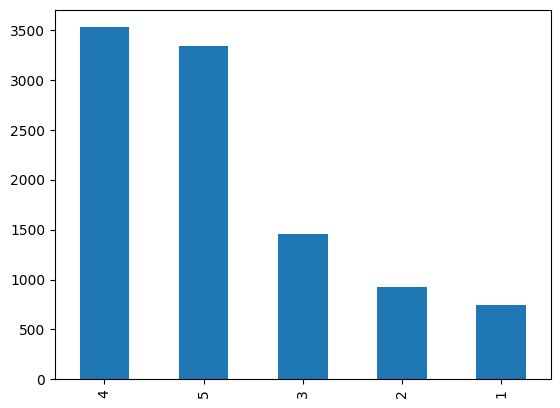

In [60]:
reviews['stars'].value_counts().plot(kind='bar')

all stars 4 and 5 are positive, others are negative


In [61]:
reviews['stars'] = np.where(reviews['stars'] >= 4, 1, 0)

In [74]:
reviews = reviews[['text', 'stars']]

<Axes: >

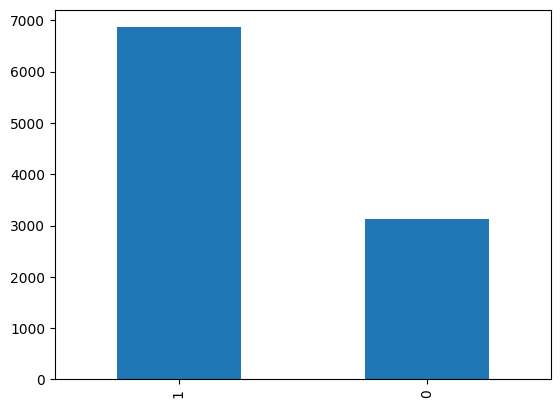

In [75]:
reviews['stars'].value_counts().plot(kind='bar')

removing some items to make 6000 positive reviews


In [76]:
reviews['stars'].value_counts()

1    6863
0    3137
Name: stars, dtype: int64

In [77]:
reviews.head(1)

,text,stars
0,My wife took me here on my birthday for breakf...,1


In [64]:
reviews['text'] = reviews['text'].replace('\n', '')

In [70]:
print(reviews[reviews['stars'] == 0].head(1)['text'])

15    Was it worth the 21$ for a salad and small piz...
Name: text, dtype: object


In [23]:
!pip install textattack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.7/418.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 73.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.

In [103]:
from textattack.augmentation import WordNetAugmenter

In [104]:
aug_data = []

def textattack_data_augment(data, texattack_augmenter):
  for text in data.values:
    text = text.replace('\n', '')
    aug_list = texattack_augmenter.augment(text)
    aug_data.append([
        aug_list[0],
        0
    ])

In [105]:
data = reviews[reviews['stars'] == 0]['text'].head(1)

aug = WordNetAugmenter()
textattack_data_augment(data, aug)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
aug_data = pd.DataFrame(aug_data, columns = ['text', 'stars'])

In [ ]:
reviews = pd.concat([reviews, aug_data])

<Axes: >

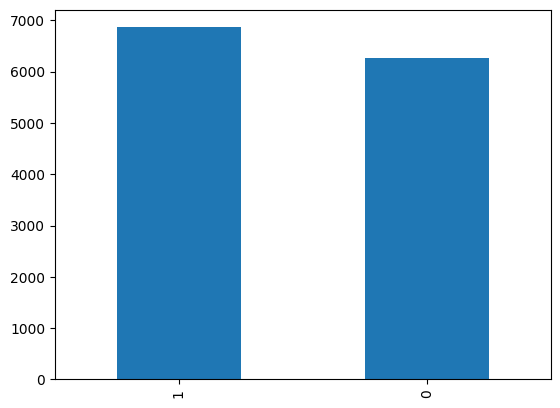

In [123]:
reviews['stars'].value_counts().plot(kind='bar')

In [122]:
reviews.to_csv('yelp_aug.csv')

In [124]:
len(reviews)

13137